In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset_train = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [23]:
training_set = dataset_train.iloc[:, 1:2].values

In [24]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [25]:
dataset_train.shape

(2035, 8)

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
dataset_train.shape

(2035, 8)

In [28]:
training_set_scaled.shape


(2035, 1)

In [33]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [34]:
dataset_train.shape

(2035, 8)

In [36]:
X_train.shape

(1975, 60)

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
X_train.shape

(1975, 60, 1)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [40]:
input_shape = (X_train.shape[1], 1)

In [41]:
input_shape

(60, 1)

In [42]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = input_shape))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [44]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [45]:
regressor.add(LSTM(units = 50))

In [47]:
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs =10, batch_size = 32)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 0.0363
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0044
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0038
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 0.0028
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0025
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0022
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0023
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0026
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0020
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0017


In [48]:
dataset_test = pd.read_csv('/content/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [49]:
dataset_test.shape

(16, 8)

In [50]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [51]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [52]:
dataset_total

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
11,208.00
12,217.00
13,223.50
14,230.00


In [53]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,76):
  X_test.append(inputs[i-60:i,0])


In [54]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


In [55]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

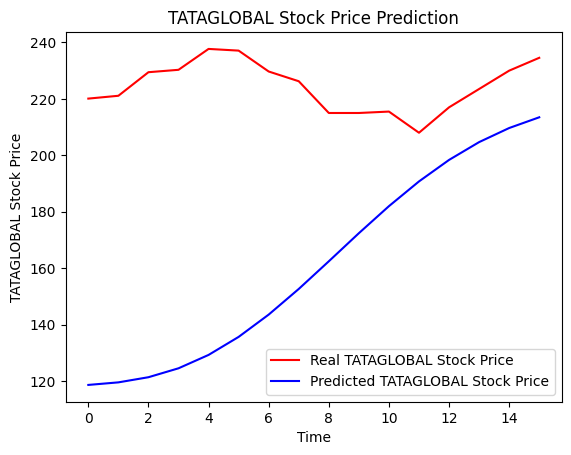

In [56]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATAGLOBAL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATAGLOBAL Stock Price')
plt.title('TATAGLOBAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATAGLOBAL Stock Price')
plt.legend()
plt.show()